<a href="https://colab.research.google.com/github/CristianMts/Escola-DNC/blob/main/RID146016_Desafio07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [219]:
!pip install yellowbrick

In [254]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import pandas as pd

## Etapa 01 - Análise exploratória dos dados


In [221]:
# Lendo o dataset
df = pd.read_csv('/content/data.csv', encoding='ISO-8859-1')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [222]:
#Resumo estatístico para verificar dados numéricos
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


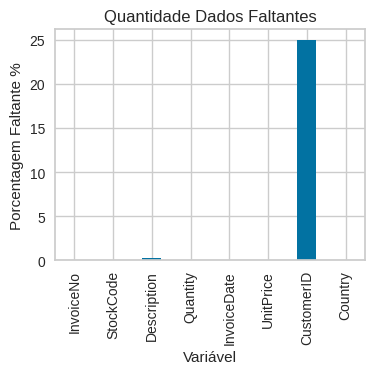

In [224]:
# Verificar valores nulos
(df.isnull().mean()*100).plot.bar(figsize=(4,3))
plt.ylabel('Porcentagem Faltante %')
plt.xlabel('Variável')
plt.title('Quantidade Dados Faltantes')
df.isnull().sum()

In [225]:
df[df.duplicated(keep=False)].sort_values('Description')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
483390,577503,72800B,4 PURPLE FLOCK DINNER CANDLES,1,11/20/2011 12:34,2.55,18110.0,United Kingdom
483414,577503,72800B,4 PURPLE FLOCK DINNER CANDLES,1,11/20/2011 12:34,2.55,18110.0,United Kingdom
160498,550459,72800B,4 PURPLE FLOCK DINNER CANDLES,1,4/18/2011 13:17,2.55,18116.0,United Kingdom
160509,550459,72800B,4 PURPLE FLOCK DINNER CANDLES,1,4/18/2011 13:17,2.55,18116.0,United Kingdom
460074,575895,23345,DOLLY GIRL BEAKER,1,11/11/2011 14:50,1.25,17052.0,United Kingdom
...,...,...,...,...,...,...,...,...
113550,545980,84836,ZINC METAL HEART DECORATION,2,3/8/2011 12:49,1.25,14730.0,United Kingdom
468873,576559,23151,ZINC SWEETHEART SOAP DISH,1,11/15/2011 13:19,2.49,14711.0,United Kingdom
468850,576559,23151,ZINC SWEETHEART SOAP DISH,1,11/15/2011 13:19,2.49,14711.0,United Kingdom
104362,545166,84832,ZINC WILLIE WINKIE CANDLE STICK,1,2/28/2011 14:03,0.85,17027.0,United Kingdom


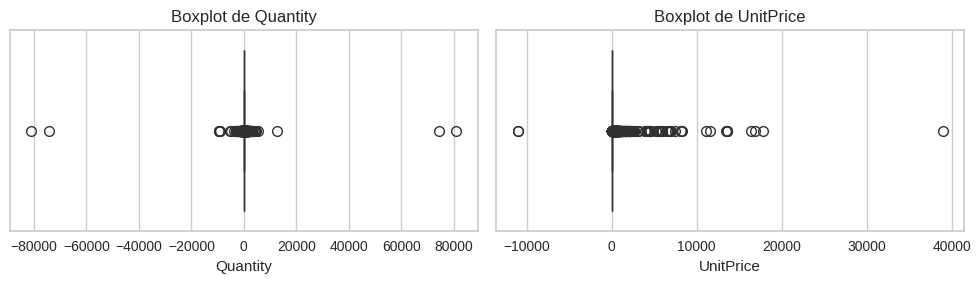

In [226]:
# Boxplot para detectar outliers
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot de Quantity')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['UnitPrice'])
plt.title('Boxplot de UnitPrice')

plt.tight_layout()
plt.show()

## Etapa 02 - Pré-processamento dos dados

In [227]:
#Drop linhas Nulas da Coluna 'CustomerID'
df.dropna(axis=0, subset='CustomerID', inplace=True)

In [228]:
df.drop(df.query('UnitPrice <= 0').index, axis=0, inplace=True)
df.drop(df.query('Quantity <= 0').index, axis=0, inplace=True)

In [229]:
# Removendo registros duplicados
df.drop_duplicates(inplace=True)
df.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [230]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

In [231]:
# Alterando o tipo de dados
df = df.astype({'InvoiceDate': 'datetime64[ns]', 'CustomerID': 'int64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392692 entries, 0 to 392691
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 24.0+ MB


In [232]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
392687,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
392688,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
392689,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
392690,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [233]:
# Eliminando outliers
df.drop(df.query('Quantity > 10000').index, axis=0, inplace=True)
df.drop(df.query('UnitPrice > 5000').index, axis=0, inplace=True)

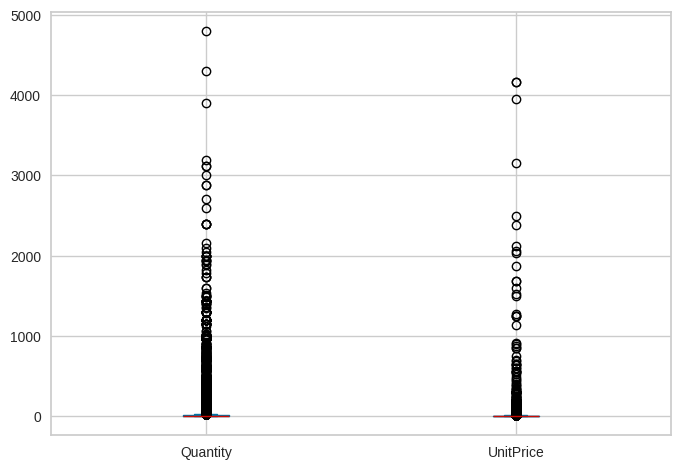

In [234]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df[['Quantity', 'UnitPrice']].plot.box();

In [235]:
# Criando Feature (Coluna Adicional)
df['Total'] = df['Quantity'] * df['UnitPrice']
df[['Quantity', 'UnitPrice', 'Total']].describe().style.format('{:.2f}')

,Quantity,UnitPrice,Total
count,392689.00,392689.00,392689.00
mean,12.72,3.11,21.99
std,43.08,18.06,95.90
min,1.00,0.00,0.00
25%,2.00,1.25,4.95
50%,6.00,1.95,12.45
75%,12.00,3.75,19.80
max,4800.00,4161.06,38970.00


In [236]:
lastdate = df['InvoiceDate'].max()
lastdate

Timestamp('2011-12-09 12:50:00')

In [237]:
# Seleção das variáveis mais relevantes para o modelo
df_cluster = df[['Quantity', 'UnitPrice', 'Total']]

In [238]:
scaler = PowerTransformer()
df_cluster_scaled = pd.DataFrame(scaler.fit_transform(df_cluster), index=df_cluster.index, columns=df_cluster.columns)
df_cluster_scaled

,Quantity,UnitPrice,Total
0,0.175378,0.344659,0.373279
1,0.175378,0.681221,0.628012
2,0.430279,0.435051,0.697460
3,0.175378,0.681221,0.628012
4,0.175378,0.681221,0.628012
...,...,...,...
392684,0.768511,-0.949555,0.005178
392685,0.175378,0.109898,0.197601
392686,-0.199281,0.911190,0.446629
392687,-0.199281,0.911190,0.446629


<Axes: >

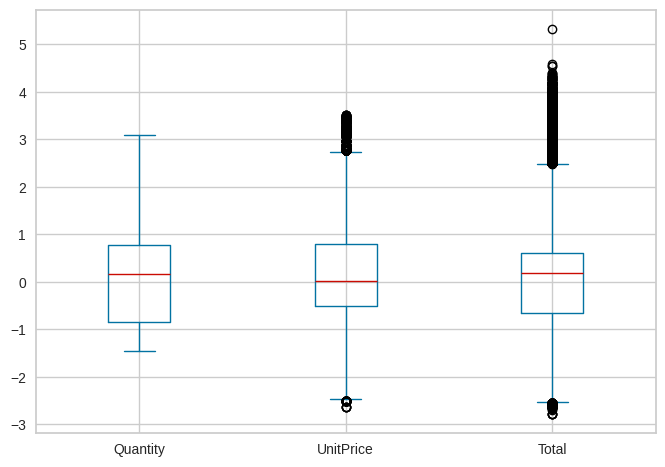

In [239]:
df_cluster_scaled.plot.box()

In [240]:
df_cluster.describe()

,Quantity,UnitPrice,Total
count,392689.000000,392689.000000,392689.000000
mean,12.724550,3.105194,21.985370
std,43.083696,18.055047,95.899104
min,1.000000,0.001000,0.001000
25%,2.000000,1.250000,4.950000
50%,6.000000,1.950000,12.450000
75%,12.000000,3.750000,19.800000
max,4800.000000,4161.060000,38970.000000


In [260]:
df_cluster_clip = df_cluster.apply(lambda x: x.clip(upper=x.quantile(.90)))
df_cluster_clip.describe()

,Quantity,UnitPrice,Total
count,392689.000000,392689.000000,392689.000000
mean,8.184204,2.494699,13.877651
std,7.654464,1.870354,10.600770
min,1.000000,0.001000,0.001000
25%,2.000000,1.250000,4.950000
50%,6.000000,1.950000,12.450000
75%,12.000000,3.750000,19.800000
max,24.000000,6.350000,35.400000


In [261]:
df_cluster_clip_scaled = df_cluster_clip.apply(scale)

##Etapa 03 - Selecione um algoritmo de clusterização

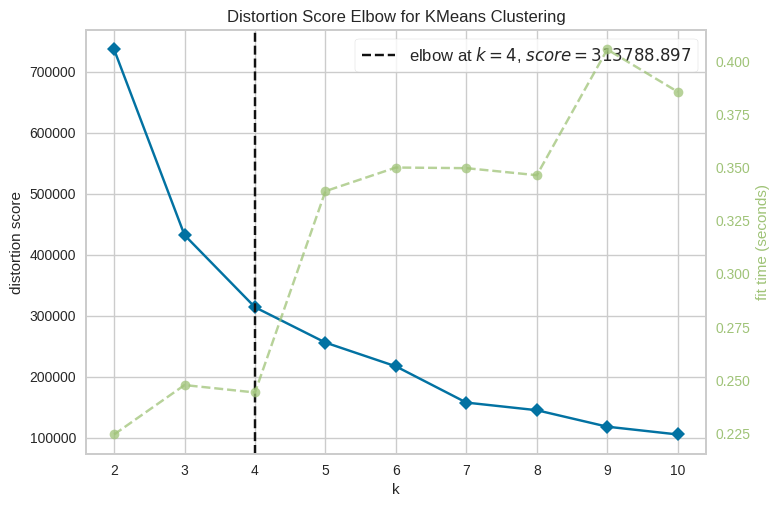

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [262]:
# KElbowVisualizer para encontrar o número ideal de clusters
visualizer = KElbowVisualizer(KMeans(), k=(2, 11), timing=False)
visualizer.fit(df_cluster_clip_scaled)
visualizer.show()

In [263]:
# Criação de Lista
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
X = df_cluster_clip_scaled.copy()

for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=0)
    labels = model.fit_predict(X)
    cluster_results_dict = {'k': k}
    cluster_results_dict['inertia'] = model.inertia_
    for metric in cluster_metrics:
        cluster_results_dict[metric.__name__] = metric(X, labels)
    cluster_metrics_results.append(cluster_results_dict)


pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

KeyboardInterrupt: 

In [264]:
pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

KeyError: "None of ['k'] are in the columns"

In [ ]:
# Calculando o Silhouette Score
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster_scaled)
    sil_score = silhouette_score(df_cluster_scaled, kmeans.labels_)
    sil_scores.append(sil_score)
# Esse gráfico ajudará a verificar o nº de clusters que maximiza o Silhouette Score.

In [ ]:
# Plotando o gráfico de Silhouette Scores
plt.figure(figsize=(5, 4))
plt.plot(range(2, 11), sil_scores, marker='o', color='g')
plt.title('Silhouette Score para Diferentes Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.show()